In [4]:
from bagpy import bagreader

b = bagreader('F_trajectories.bag')

[INFO]  Data folder F_trajectories already exists. Not creating.


In [5]:
print(b.topic_table)

                                     Topics                        Types  \
0                                 /gps_odom            nav_msgs/Odometry   
1                                /orb_slam3            nav_msgs/Odometry   
2  /pointgrey/camera/image_color/compressed  sensor_msgs/CompressedImage   

   Message Count  Frequency  
0           2606   7.955012  
1           5685  19.770092  
2           6280  19.804257  


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import cv2

In [7]:
gps_csv_path = b.message_by_topic('/gps_odom')
gps_df = pd.read_csv(gps_csv_path)
gps_df.head()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,child_frame_id,pose.pose.position.x,pose.pose.position.y,pose.pose.position.z,pose.pose.orientation.x,...,pose.pose.orientation.z,pose.pose.orientation.w,pose.covariance,twist.twist.linear.x,twist.twist.linear.y,twist.twist.linear.z,twist.twist.angular.x,twist.twist.angular.y,twist.twist.angular.z,twist.covariance
0,1.627296e+09,0,1627295713,698807954,map,dgps_base,0.000000,0.000000,0.0,0.0,...,-0.977829,-0.209406,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1.627296e+09,1,1627295713,824233055,map,dgps_base,0.000000,0.000000,0.0,0.0,...,-0.977775,-0.209659,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1.627296e+09,2,1627295713,948621034,map,dgps_base,0.011337,0.000306,0.0,0.0,...,-0.977638,-0.210296,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1.627296e+09,3,1627295714,78018903,map,dgps_base,0.011337,0.000306,0.0,0.0,...,-0.977670,-0.210147,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1.627296e+09,4,1627295714,197382926,map,dgps_base,0.000000,0.000000,0.0,0.0,...,-0.977736,-0.209839,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [8]:
img_csv_path = b.message_by_topic('/pointgrey/camera/image_color/compressed')
img_df = pd.read_csv(img_csv_path)

print("*** Dane obrazowe:")
print(img_df.columns)
print(img_df.head())

*** Dane obrazowe:
Index(['Time', 'header.seq', 'header.stamp.secs', 'header.stamp.nsecs',
       'header.frame_id', 'format', 'data'],
      dtype='object')
           Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0  1.627296e+09           0         1627295694           382721792   
1  1.627296e+09           0         1627295694           434359296   
2  1.627296e+09           0         1627295694           481393408   
3  1.627296e+09           0         1627295694           533581568   
4  1.627296e+09           0         1627295694           581189632   

  header.frame_id format                                               data  
0          camera    jpg  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...  
1          camera    jpg  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...  
2          camera    jpg  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...  
3          camera    jpg  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...  
4          camera    jpg  b'\xf

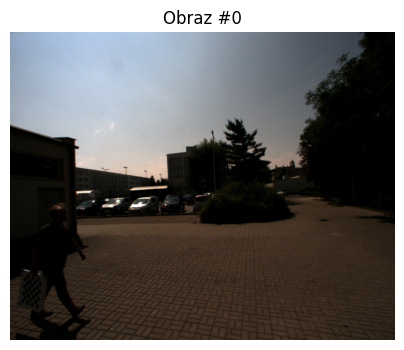

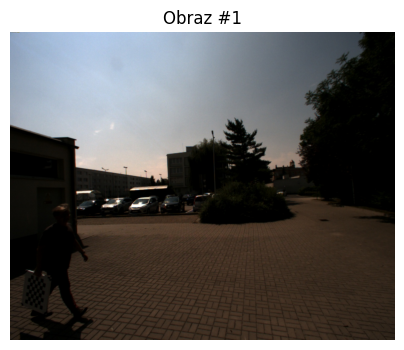

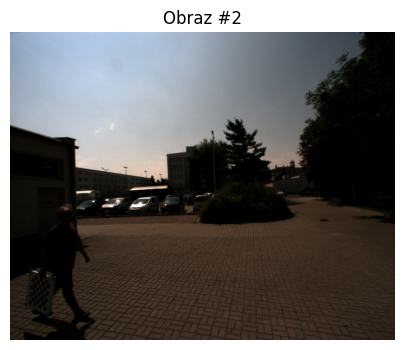

In [9]:
import ast

def parse_image_bytes(row_data):
    try:
        byte_data = ast.literal_eval(row_data)
        byte_array = np.frombuffer(byte_data, dtype=np.uint8)
        img = cv2.imdecode(byte_array, cv2.IMREAD_COLOR)
        if img is not None:
            return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        else:
            return None
    except Exception as e:
        print(f"Błąd przy dekodowaniu: {e}")
        return None

num_images = 3
for i in range(min(num_images, len(img_df))):
    img = parse_image_bytes(img_df.iloc[i]['data'])
    if img is not None:
        plt.figure(figsize=(6, 4))
        plt.imshow(img)
        plt.title(f"Obraz #{i}")
        plt.axis('off')
        plt.show()
    else:
        print(f"Nie udało się sparsować obrazu #{i}")

### Informacje podstawowe

In [10]:
print("** Liczba wierszy:", len(gps_df))
print("** Liczba kolumn:", gps_df.shape[1])

print("** Typy danych:\n", gps_df.dtypes)

** Liczba wierszy: 2606
** Liczba kolumn: 21
** Typy danych:
 Time                       float64
header.seq                   int64
header.stamp.secs            int64
header.stamp.nsecs           int64
header.frame_id             object
child_frame_id              object
pose.pose.position.x       float64
pose.pose.position.y       float64
pose.pose.position.z       float64
pose.pose.orientation.x    float64
pose.pose.orientation.y    float64
pose.pose.orientation.z    float64
pose.pose.orientation.w    float64
pose.covariance             object
twist.twist.linear.x       float64
twist.twist.linear.y       float64
twist.twist.linear.z       float64
twist.twist.angular.x      float64
twist.twist.angular.y      float64
twist.twist.angular.z      float64
twist.covariance            object
dtype: object


In [11]:
print("** Liczba brakujących wartości:\n", gps_df.isnull().sum())

** Liczba brakujących wartości:
 Time                       0
header.seq                 0
header.stamp.secs          0
header.stamp.nsecs         0
header.frame_id            0
child_frame_id             0
pose.pose.position.x       0
pose.pose.position.y       0
pose.pose.position.z       0
pose.pose.orientation.x    0
pose.pose.orientation.y    0
pose.pose.orientation.z    0
pose.pose.orientation.w    0
pose.covariance            0
twist.twist.linear.x       0
twist.twist.linear.y       0
twist.twist.linear.z       0
twist.twist.angular.x      0
twist.twist.angular.y      0
twist.twist.angular.z      0
twist.covariance           0
dtype: int64


In [12]:
print("** Liczba unikalnych wartości: \n", gps_df.nunique())

** Liczba unikalnych wartości: 
 Time                       2606
header.seq                 2606
header.stamp.secs           402
header.stamp.nsecs         2574
header.frame_id               1
child_frame_id                1
pose.pose.position.x       2193
pose.pose.position.y       2193
pose.pose.position.z         14
pose.pose.orientation.x       1
pose.pose.orientation.y       1
pose.pose.orientation.z    2452
pose.pose.orientation.w    2453
pose.covariance               1
twist.twist.linear.x          1
twist.twist.linear.y          1
twist.twist.linear.z          1
twist.twist.angular.x         1
twist.twist.angular.y         1
twist.twist.angular.z         1
twist.covariance              1
dtype: int64


In [13]:
print("** Statystyki opisowe (numeryczne):\n", gps_df.describe())
print("** Statystyki opisowe (nienumeryczne):\n", gps_df.describe(include=['object']))

** Statystyki opisowe (numeryczne):
                Time   header.seq  header.stamp.secs  header.stamp.nsecs  \
count  2.606000e+03  2606.000000       2.606000e+03        2.606000e+03   
mean   1.627296e+09  1302.500000       1.627296e+09        5.255526e+08   
std    1.175690e+02   752.431724       1.175675e+02        2.812331e+08   
min    1.627296e+09     0.000000       1.627296e+09        7.027507e+07   
25%    1.627296e+09   651.250000       1.627296e+09        3.232350e+08   
50%    1.627296e+09  1302.500000       1.627296e+09        5.698885e+08   
75%    1.627296e+09  1953.750000       1.627296e+09        8.211560e+08   
max    1.627296e+09  2605.000000       1.627296e+09        9.713840e+08   

       pose.pose.position.x  pose.pose.position.y  pose.pose.position.z  \
count           2606.000000           2606.000000           2606.000000   
mean              36.370210             -1.054050              0.184919   
std               42.353212             41.963675             

## Histogramy zmiennych numerycznych

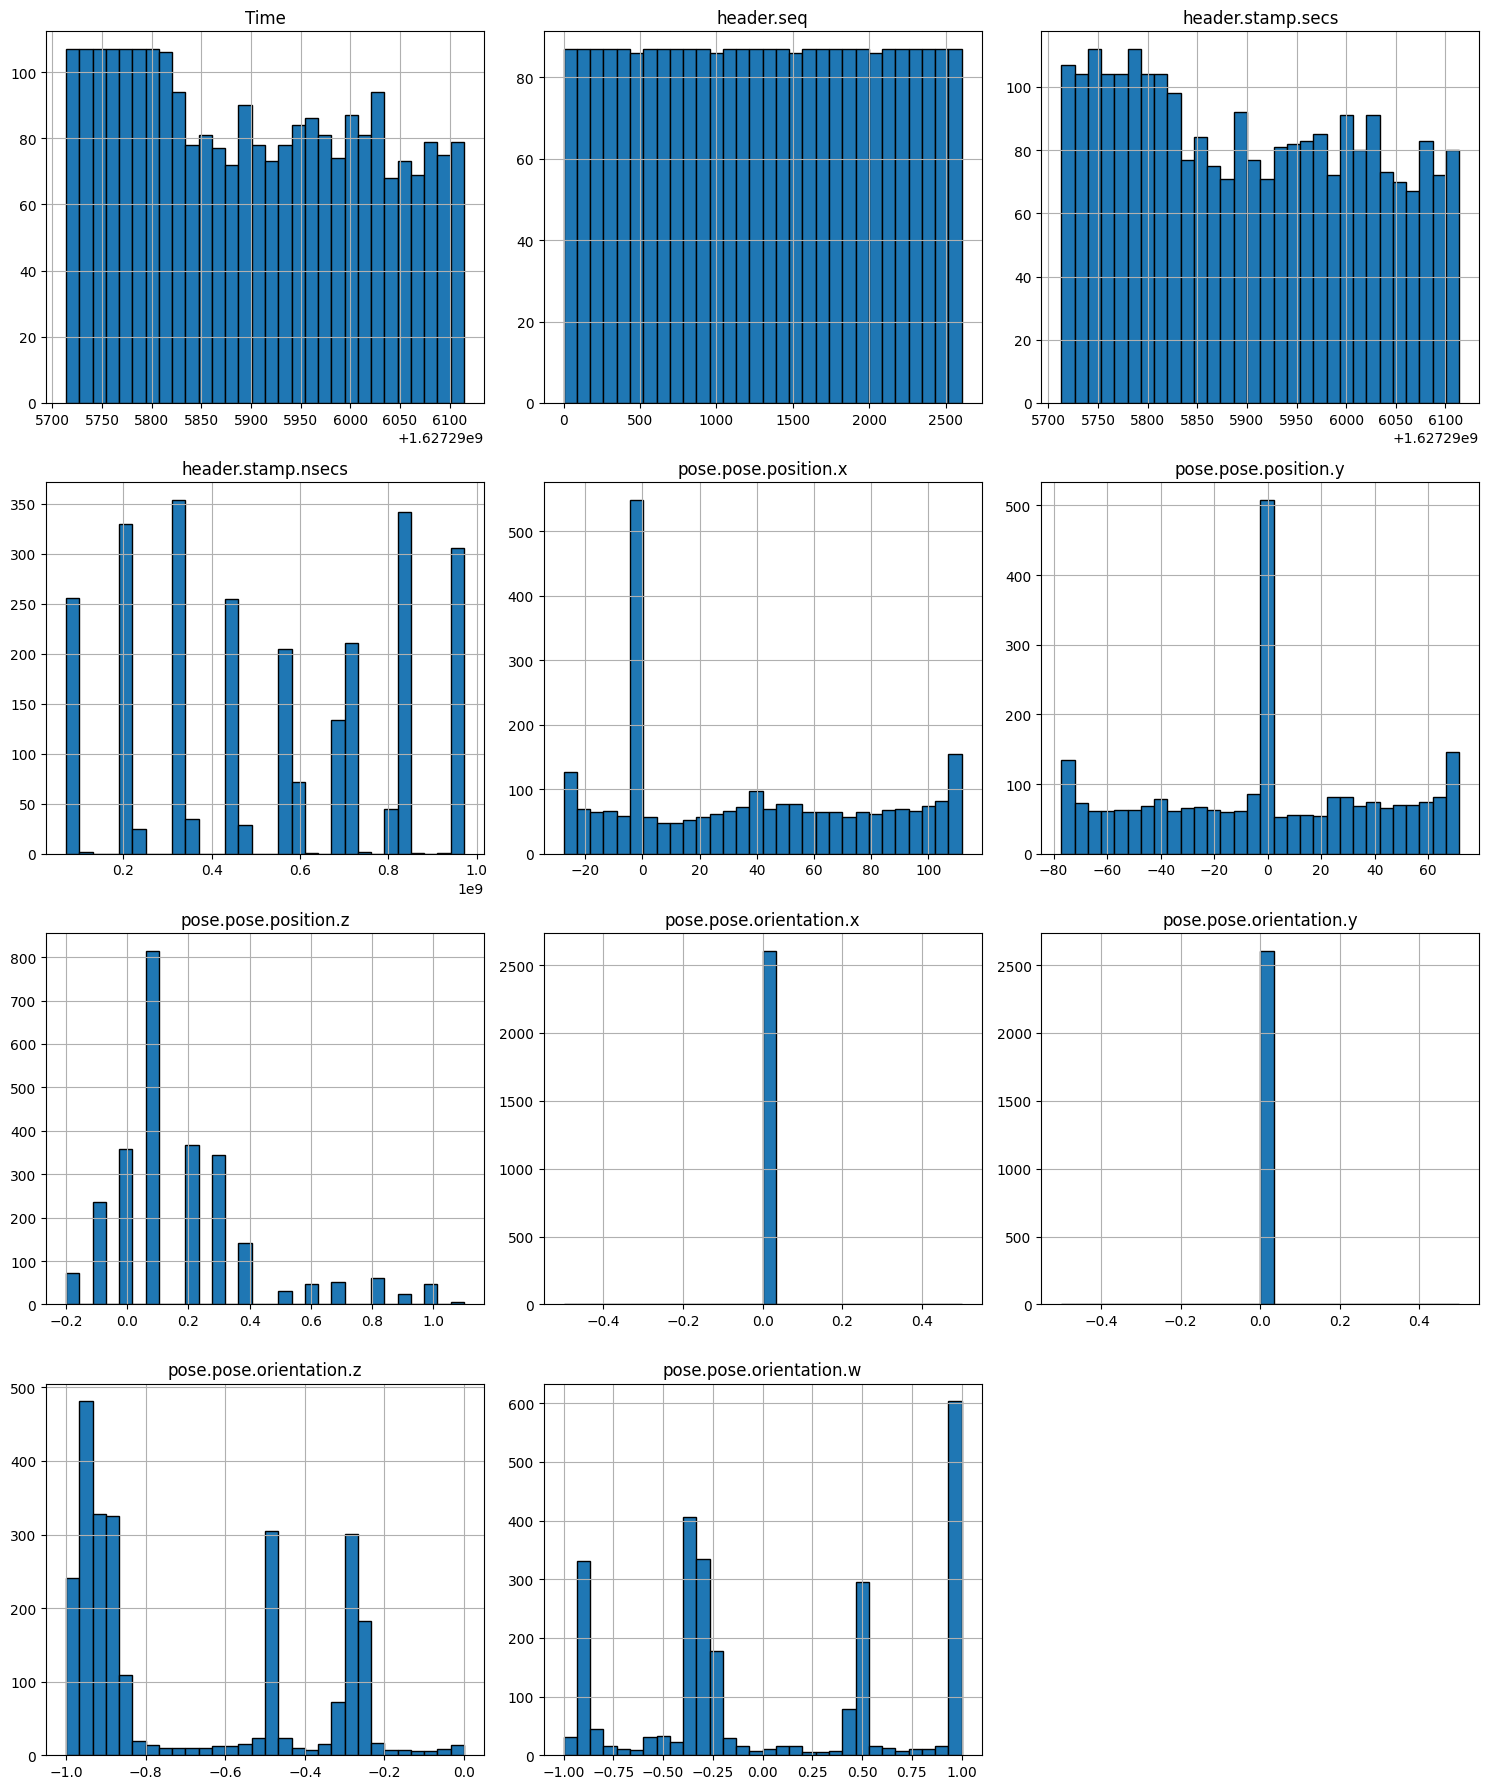

In [14]:
numeric_cols = gps_df.select_dtypes(include=['float64', 'int64']).columns
drop_twist = [col for col in numeric_cols if not col.startswith('twist')]

gps_df[drop_twist].hist(figsize=(15, 18), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

## Macierz korelacji

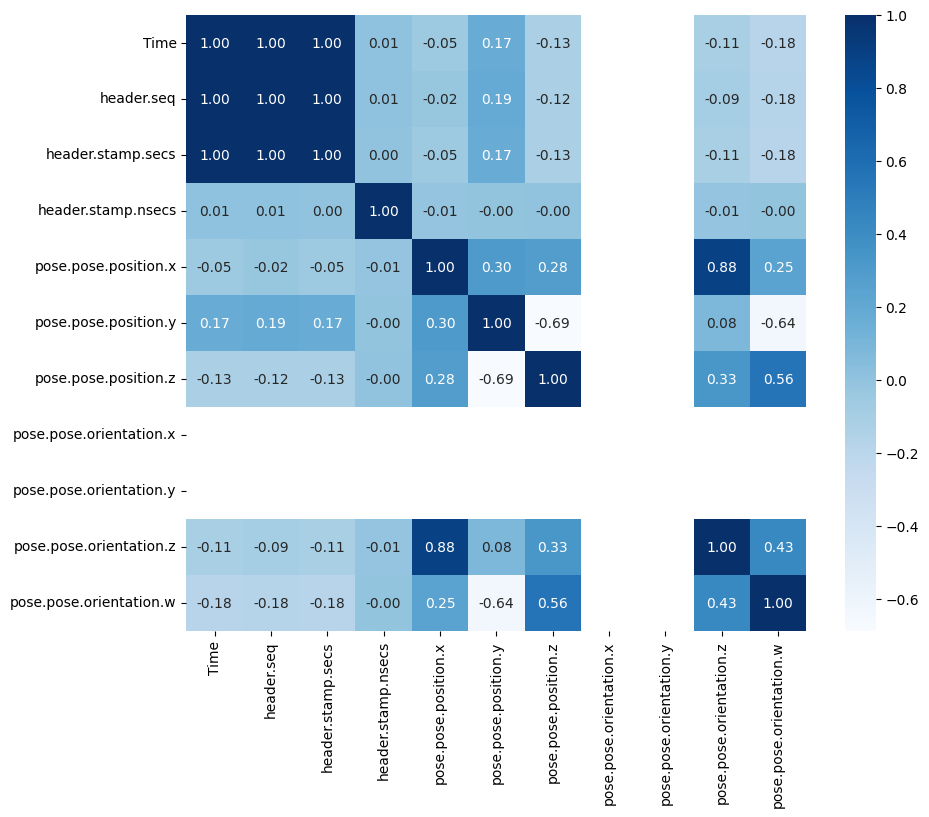

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(gps_df[drop_twist].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.show()

## Analiza outlierów

Time: Z-score outliers = 0, IQR outliers = 0


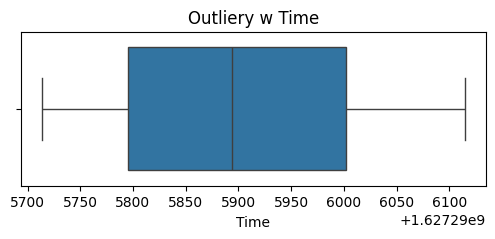

header.seq: Z-score outliers = 0, IQR outliers = 0


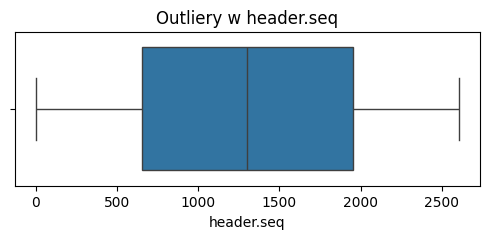

header.stamp.secs: Z-score outliers = 0, IQR outliers = 0


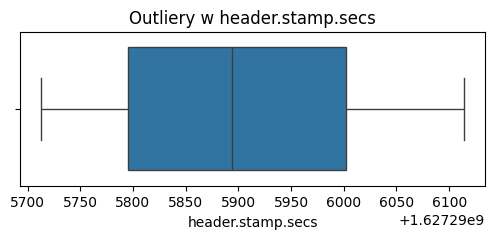

header.stamp.nsecs: Z-score outliers = 0, IQR outliers = 0


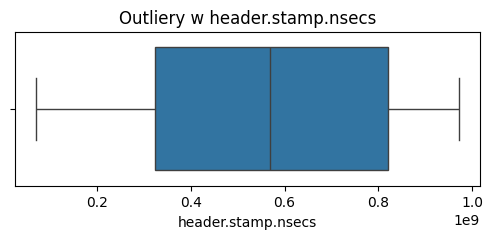

pose.pose.position.x: Z-score outliers = 0, IQR outliers = 0


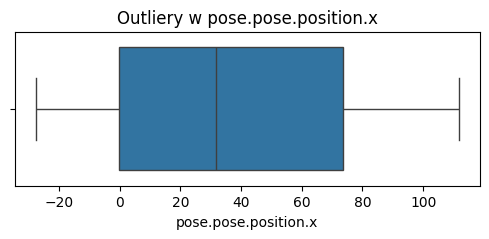

pose.pose.position.y: Z-score outliers = 0, IQR outliers = 0


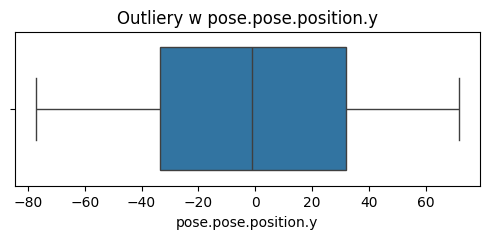

pose.pose.position.z: Z-score outliers = 53, IQR outliers = 138


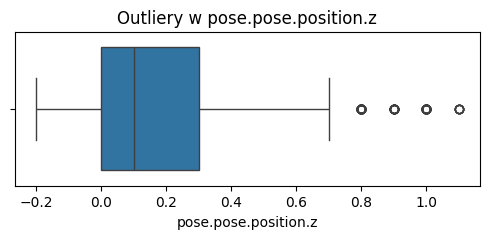

pose.pose.orientation.x: Z-score outliers = 0, IQR outliers = 0


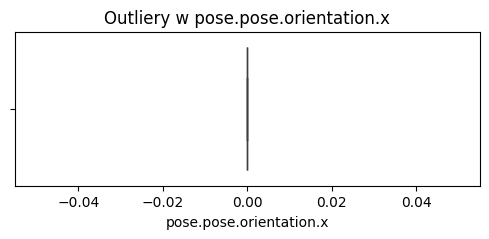

pose.pose.orientation.y: Z-score outliers = 0, IQR outliers = 0


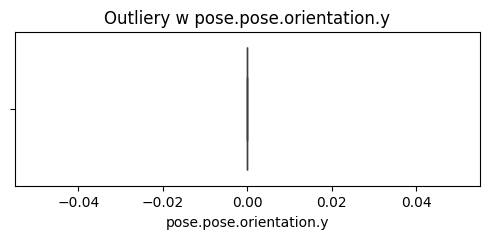

pose.pose.orientation.z: Z-score outliers = 0, IQR outliers = 0


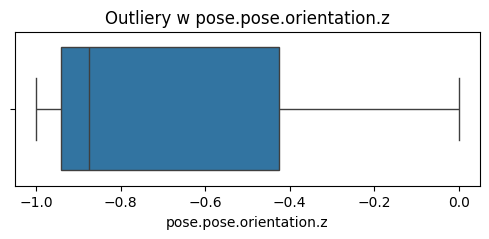

pose.pose.orientation.w: Z-score outliers = 0, IQR outliers = 0


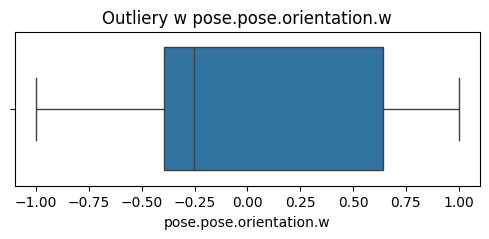

In [18]:
for col in drop_twist:
    z_scores = np.abs(stats.zscore(gps_df[col].dropna()))
    iqr = gps_df[col].quantile(0.75) - gps_df[col].quantile(0.25)
    lower_bound = gps_df[col].quantile(0.25) - 1.5 * iqr
    upper_bound = gps_df[col].quantile(0.75) + 1.5 * iqr
    outliers_z = (z_scores > 3).sum()
    outliers_iqr = ((gps_df[col] < lower_bound) | (gps_df[col] > upper_bound)).sum()
    print(f"{col}: Z-score outliers = {outliers_z}, IQR outliers = {outliers_iqr}")

    plt.figure(figsize=(6, 2))
    sns.boxplot(x=gps_df[col])
    plt.title(f'Outliery w {col}')
    plt.show()